In [2]:
# Exploring hand-written digits

from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

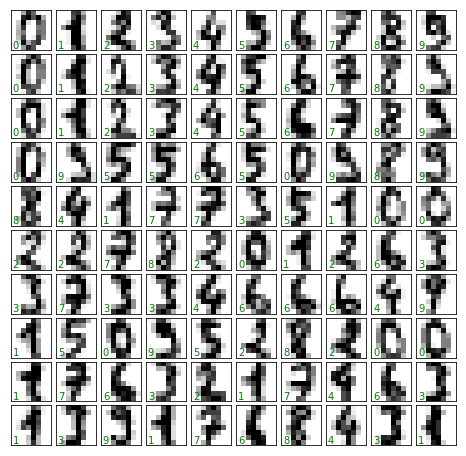

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10,10, figsize = (8,8),
                        subplot_kw = {'xticks':[], 'yticks':[]},
                        gridspec_kw = dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')

In [7]:
X = digits.data
X.shape

(1797, 64)

In [11]:
y = digits.target
y.shape

(1797,)

In [13]:
# unsupervised learning: dimensionality reduction

from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

TypeError: __init__() got an unexpected keyword argument 'tricks'

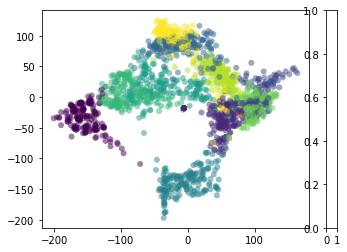

In [16]:
plt.scatter(data_projected[:,0], data_projected[:,1],
           c=digits.target, edgecolor='none', alpha=0.5)
plt.colorbar(label='digit label', tricks = range(10))
plt.clim(-0.5,9.5)

In [19]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [22]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Text(91.68,0.5,'true value')

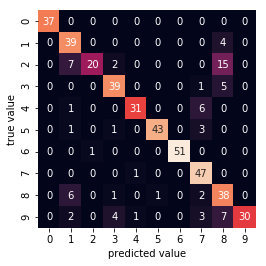

In [31]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square = True,
           annot=True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

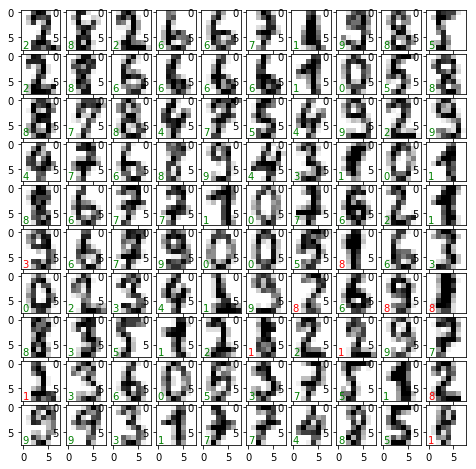

In [32]:
fig, axes = plt.subplots(10,10, figsize=(8,8),
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1,8,8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
           transform=ax.transAxes,
           color = 'green' if (ytest[i] == y_model[i]) else 'red')